<a href="https://colab.research.google.com/github/vonGrave/Linear-Regression-LifeExpectancyPrediction/blob/main/LifeExpectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

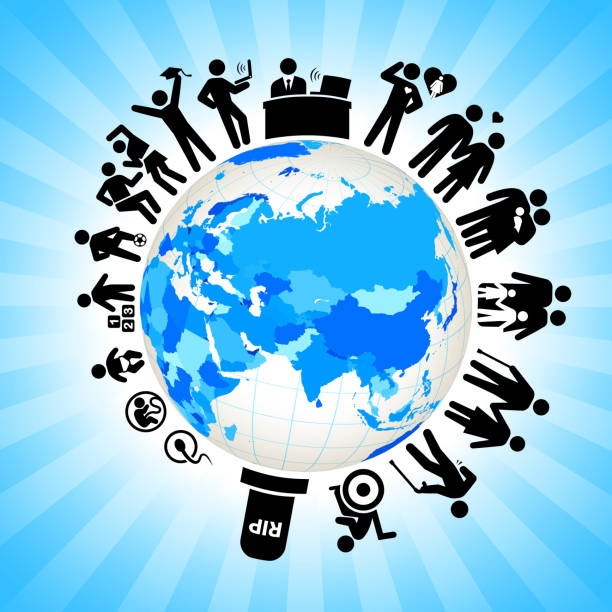

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
data = pd.read_csv("Life_Expectancy_Data.csv")

### Data Overview

In [5]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


**Observations**

- The first five rows show data for Afghanistan across 5 different years.
- The life expectancy varies from 59.2 to 65 years.
- The *Status* column seems to have text values, which will have to be converted to numerics for modeling purposes.

In [6]:
data.shape

(2938, 22)

In [7]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness  1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

**Observations**

- Most of the columns in the data are numeric in nature (integer or float).
- `Country` and `Status` columns are of *object* type, which means they have text values.
- Some columns seem to have null (or missing) values too.

In [9]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,2938,193,Afghanistan,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,2938.0,NaN,NaN,NaN,2007.51872,4.613841,2000.0,2004.0,2008.0,2012.0,2015.0
Status,2938,2,Developing,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Life expectancy,2928.0,NaN,NaN,NaN,69.224932,9.523867,36.3,63.1,72.1,75.7,89.0
Adult Mortality,2928.0,NaN,NaN,NaN,164.796448,124.292079,1.0,74.0,144.0,228.0,723.0
Infant deaths,2938.0,NaN,NaN,NaN,30.303948,117.926501,0.0,0.0,3.0,22.0,1800.0
Alcohol,2744.0,NaN,NaN,NaN,4.602861,4.052413,0.01,0.8775,3.755,7.7025,17.87
Percentage expenditure,2938.0,NaN,NaN,NaN,738.251295,1987.914858,0.0,4.685343,64.912906,441.534144,19479.91161
Hepatitis B,2385.0,NaN,NaN,NaN,80.940461,25.070016,1.0,77.0,92.0,97.0,99.0
Measles,2938.0,NaN,NaN,NaN,2419.59224,11467.272489,0.0,0.0,17.0,360.25,212183.0


**Observations**

- There are 193 countries in the dataset.
- Most of the countries in the dataset are developing countries.
- The average life expectancy is ~69 years.

**Fix the missing values.**

- For the target variable (`Life expectancy`), drop the missing values.
- For the predictor variables, replace the missing values in each column with its median.

In [10]:
df = data.copy()

In [11]:
df.dropna(subset=["Life expectancy"], inplace=True)

In [12]:
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller, axis=0)

In [13]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
Infant deaths,0
Alcohol,0
Percentage expenditure,0
Hepatitis B,0
Measles,0


- All the missing values have been treated.

In [14]:
df.nunique()

,0
Country,183
Year,16
Status,2
Life expectancy,362
Adult Mortality,425
Infant deaths,209
Alcohol,1076
Percentage expenditure,2323
Hepatitis B,87
Measles,958


**Observations**

- The *Status* column has 2 unique values - "*Developing*" and "*Developed*"
- The *Country* column has 183 unique values, i.e., the data is collected from 183 countries.

Datatype of two columns (`Status` and `Country`) is object. So convert both to categorical type for further processing in the next steps.

## EDA

### Univariate analysis

In [22]:

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="skyblue"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )
    # Add legend, labels, and title
    ax_hist2.legend(loc="upper right", fontsize=12)
    ax_hist2.set_title(f"Histogram of {feature}", fontsize=14, pad=10)
    ax_hist2.set_xlabel(feature, fontsize=12)
    ax_hist2.set_ylabel("Frequency", fontsize=12)

**Explore the dependent variable *Life expectancy***

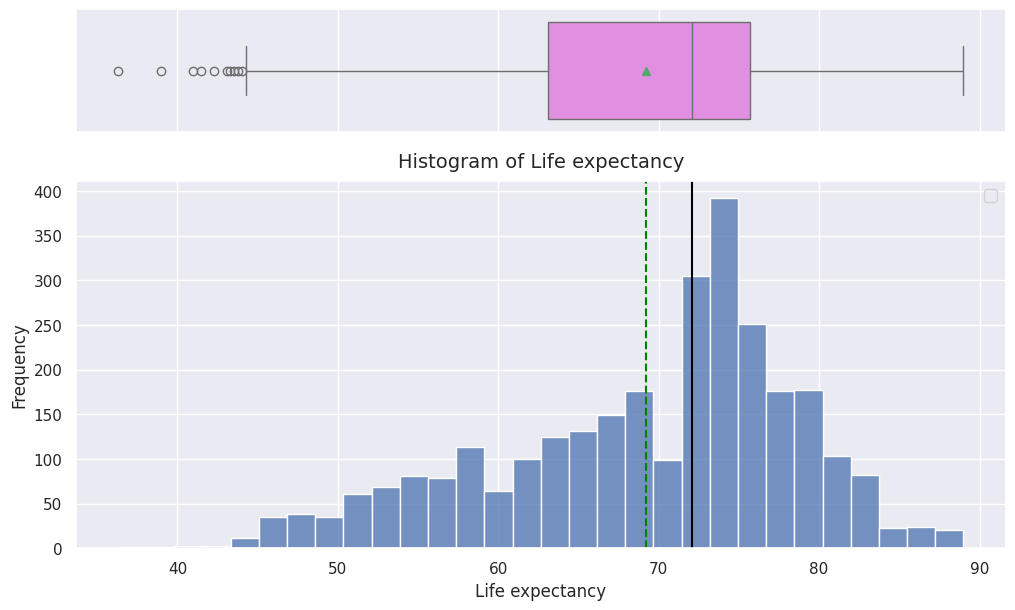

In [23]:
histogram_boxplot(df, "Life expectancy")

**Observations**

- `Life expectancy` is left-skewed, which means some countries have life expectancy less than 45 years.
- Mean life expectancy is around 72 years.

**Explore per capita alcohol consumption**

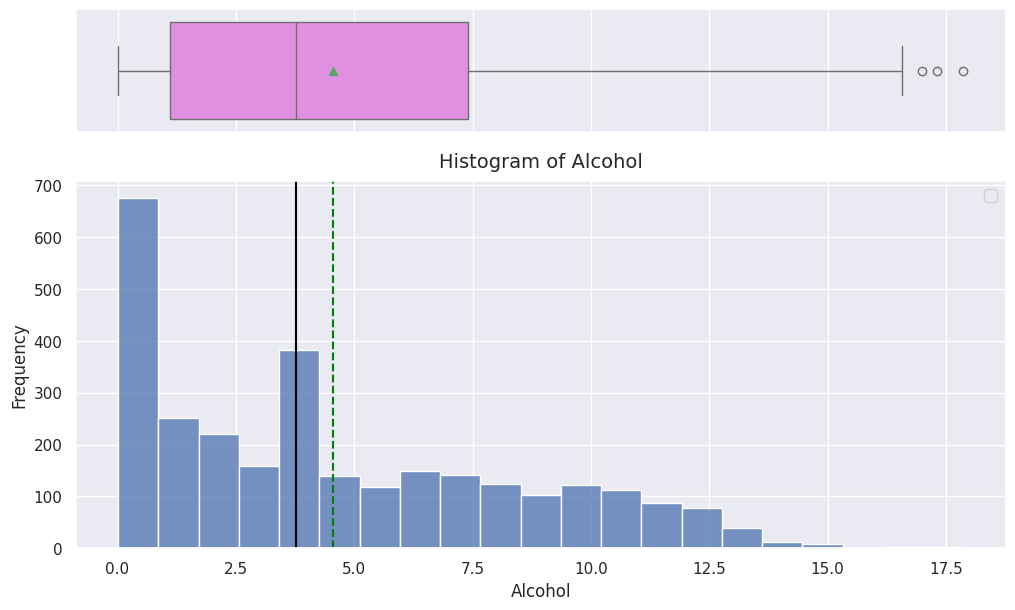

In [17]:
histogram_boxplot(df, "Alcohol")

**Observations**

* The median alcohol consumption is 3.75 litres.
* There are some outliers where average alcohol consumption is more than 15 litres.
* The distribution is right-skewed.

**Explore GDP**

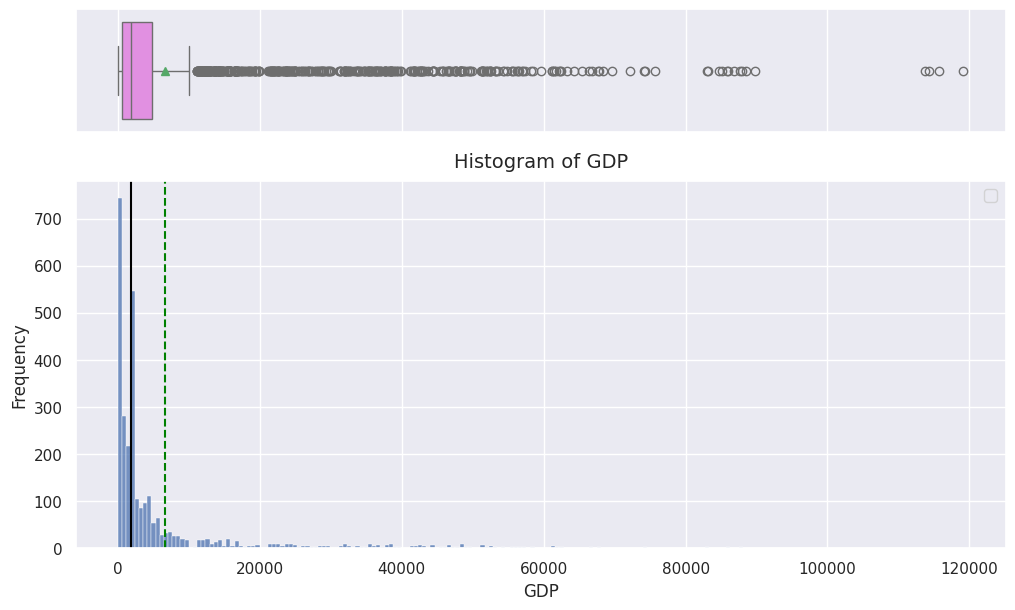

In [18]:
histogram_boxplot(df, "GDP")

**Observations**

* The distribution of GDP is heavily skewed to the right.
* The outliers to the right indicate that many countries have a very high GDP.

In [19]:

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

<ipython-input-19-a9bc89a3f0a8>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


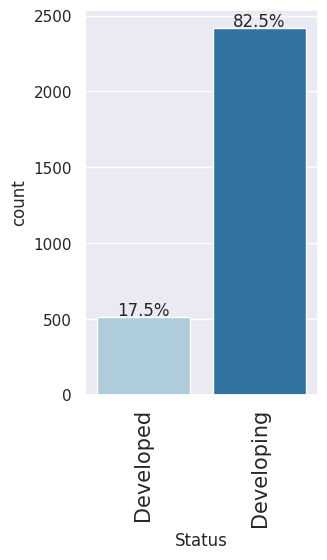

In [20]:
labeled_barplot(df, "Status", perc=True)

- More than 80% of the countries in the data are developing countries.

### Bivariate Analysis

**Correlations of Attributes.**

In [24]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns].corr()["Life expectancy"][:]

,Life expectancy
Year,0.170033
Life expectancy,1.000000
Adult Mortality,-0.696359
Infant deaths,-0.196557
Alcohol,0.390674
Percentage expenditure,0.381864
Hepatitis B,0.171255
Measles,-0.157586
BMI,0.558888
Under-five deaths,-0.222529


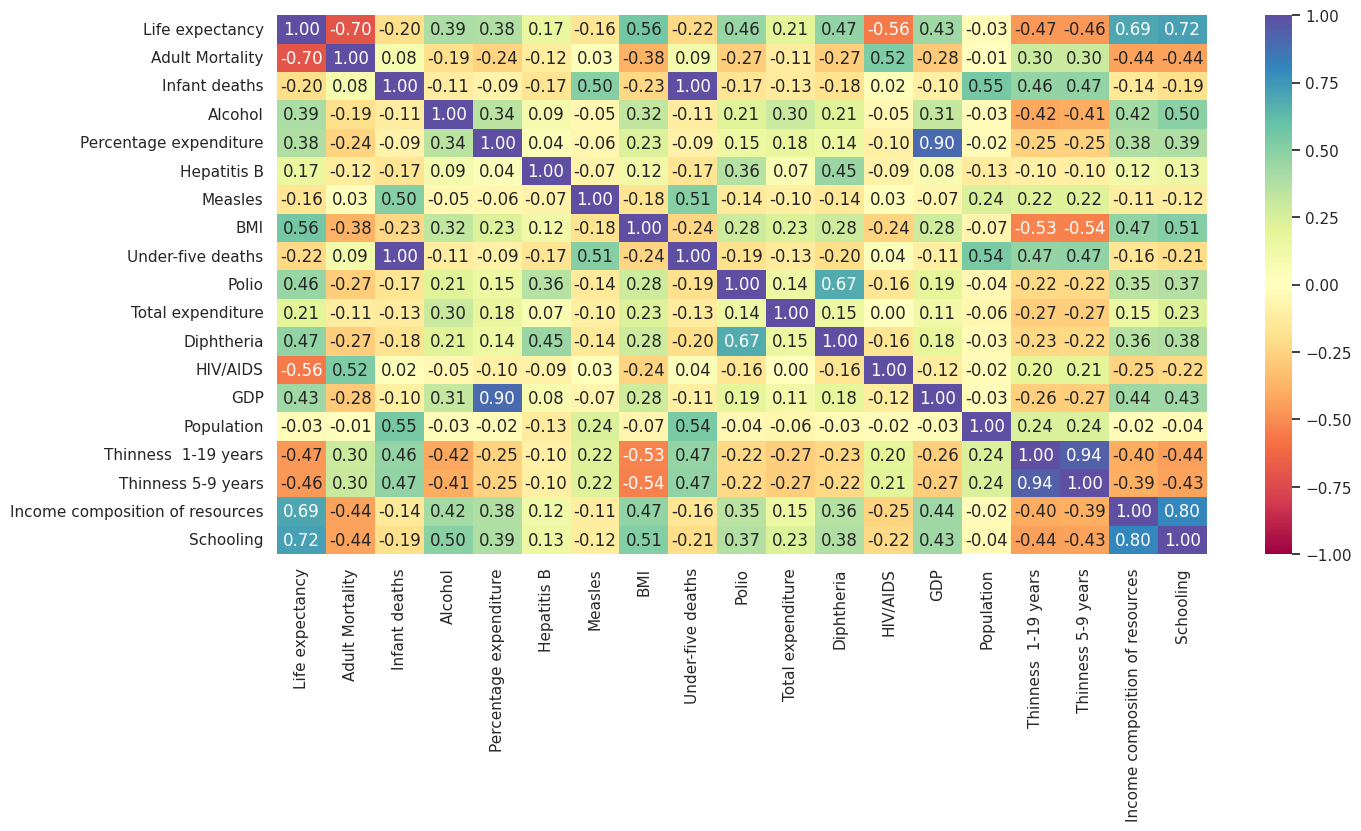

In [25]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("Year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

**Observations**

* `Life expectancy` is highly negatively correlated with `Adult Mortality` and `HIV/AIDs`, which means that as adult mortality and HIV death (0-4 years) increases, life expectancy tends to decrease.

* `Life expectancy` is highly positively correlated with `Schooling` and `Income composition of resources`, which means that as schooling years of citizens in a country and income composition of resources increases, life expectancy tends to increase.

**Graphs of few variables highly correlated with `Life expectancy`.**

**`Life expectancy` vs `HIV/AIDS` vs `Status`**

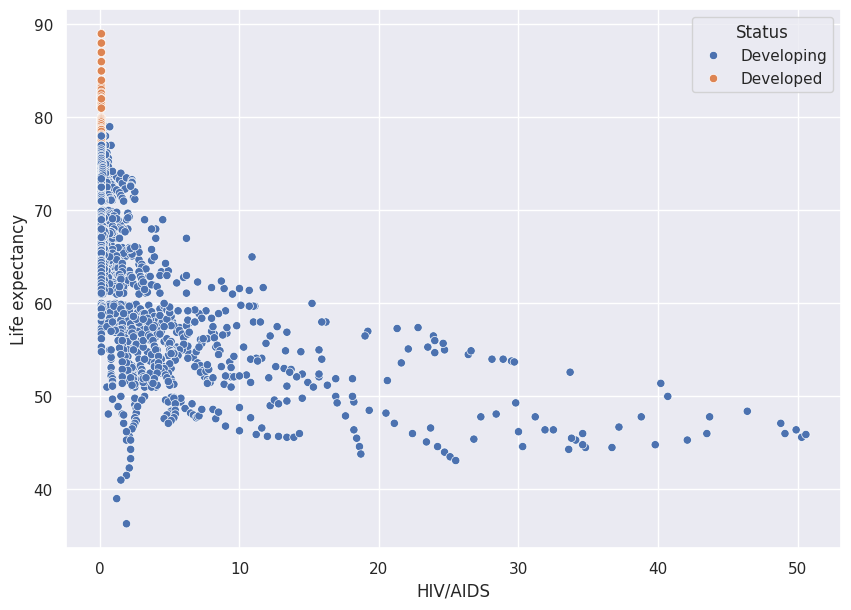

In [26]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Life expectancy", x="HIV/AIDS", hue="Status", data=df)
plt.show()

* Developed countries have very low cases of HIV/AIDS.

**`Life expectancy` vs `Schooling` vs `Status`**

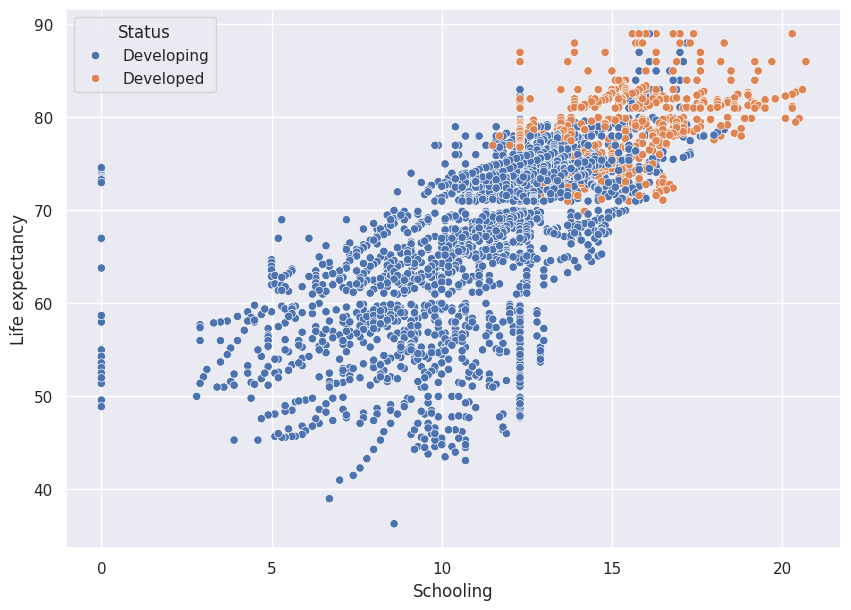

In [27]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Life expectancy", x="Schooling", hue="Status", data=df)
plt.show()

**Observations**

* Majority of the developed countries have schooling of more than 13 years.
* Developing countries have a higher variance in schooling years.

**Variation in life expectancy across years.**

<ipython-input-28-38e34f067f47>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Year", y="Life expectancy", data=df, ci=None)


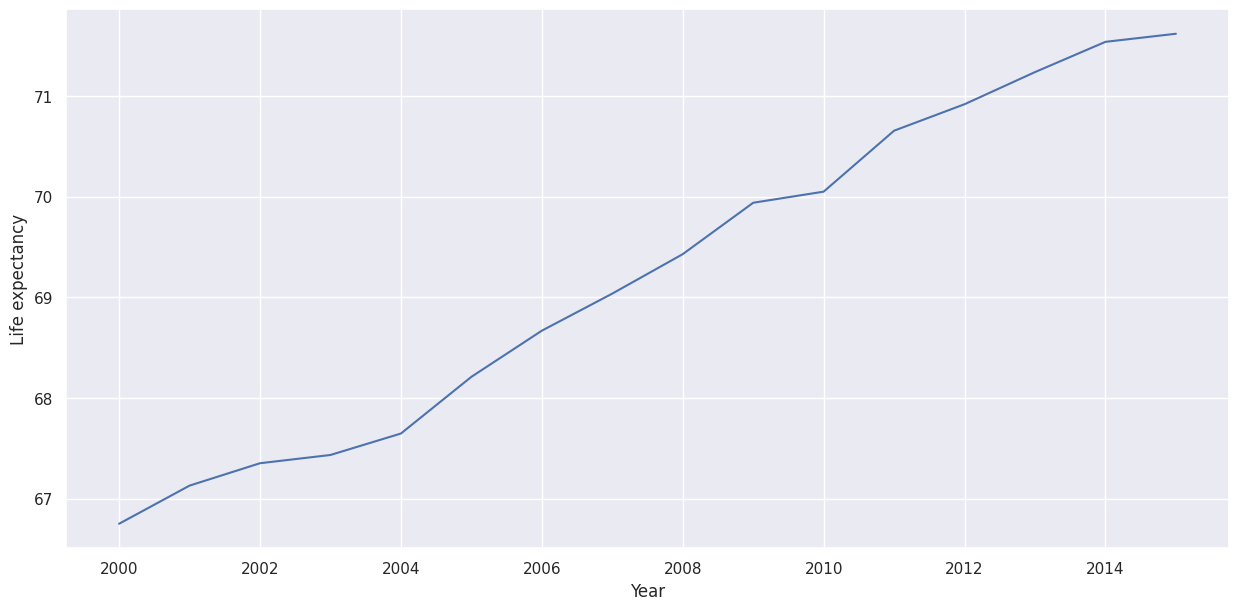

In [28]:
plt.figure(figsize=(15, 7))
sns.lineplot(x="Year", y="Life expectancy", data=df, ci=None)
plt.show()

* Overall life expectancy of the world population is increasing over the years.

### Column binning

- Let's group all countries into continents to avoid having too many dummy variables while modeling.

In [29]:
# Installing library to group countries into continents

!pip install pycountry-convert

In [30]:
import pycountry_convert as pc


def country_to_continent(country_name):
    """
    country_name : name of country for which continent is needed
    """
    if "(" in country_name:
        country_name = country_name.split(" ")[0]
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(
        country_continent_code
    )
    return country_continent_name

* Above error is arising because names of the countries are different from what the library has.
* In order to resolve this, we looked at all country names that caused this error and hard-coded them as shown below.

In [32]:
loc = df.Country.tolist()
continent = dict()

# hard-coding the continent names of those countries which were giving error with country_to_continent function
for cn in loc:
    if cn == "Republic of Korea":
        continent[cn] = "Asia"
    elif cn == "The former Yugoslav republic of Macedonia":
        continent[cn] = "Europe"
    elif cn == "Timor-Leste":
        continent[cn] = "Asia"
    else:
        continent[cn] = country_to_continent(cn)

In [33]:
# mapping every country to its continent
df["Continent"] = df["Country"].map(continent)

In [34]:
# unique continents
print(df["Country"].map(continent).unique())

['Asia' 'Europe' 'Africa' 'North America' 'South America' 'Oceania']


<ipython-input-19-a9bc89a3f0a8>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


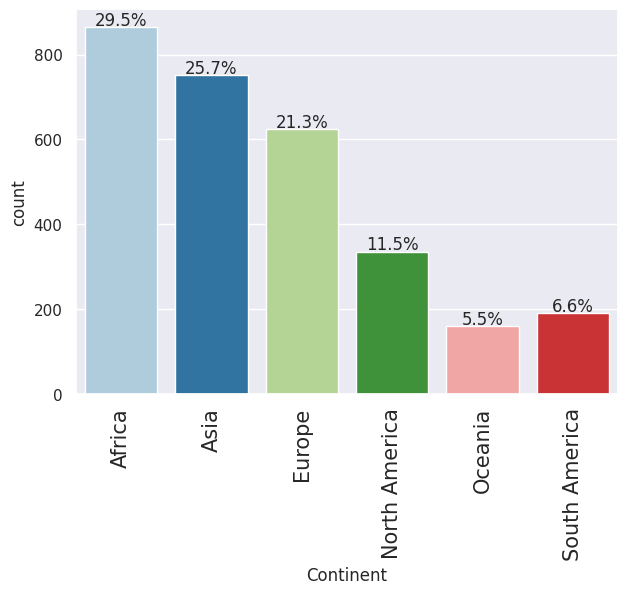

In [35]:
labeled_barplot(df, "Continent", perc=True)

**Observations**

- More than 75% of the data points are from Africa, Asia, and Europe.
- Oceania accounts for only 5.5% of the data points.

**`Life expectancy` vs `Adult Mortality` vs `Continent`**

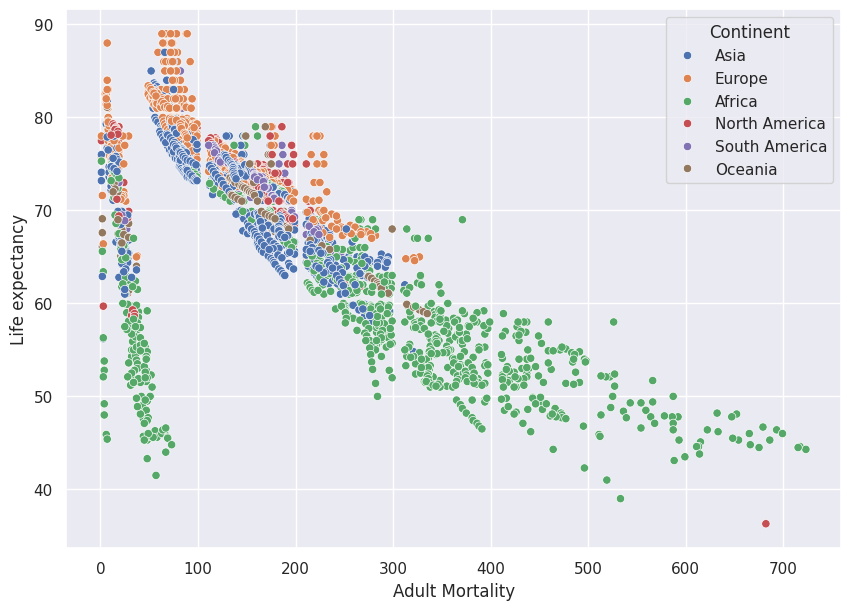

In [36]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Life expectancy", x="Adult Mortality", hue="Continent", data=df)
plt.show()

* Many European countries have had life expectancy higher than 80 years for some years.
* Most of the African countries have higher adult mortality and life expectancy lower than 65 years.

**Median `Life expectancy` by `Country` and `Status`**

In [ ]:
df_hm = df.pivot_table(
    index="Continent", columns="Status", values="Life expectancy", aggfunc=np.median
)

# Draw a heatmap
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df_hm, cmap="Spectral", linewidths=0.5, annot=True, ax=ax)
plt.show()

- Developed countries from Asia have the highest life expectancy.

**Convert the *object* type columns to *category* type**

In [37]:
df["Country"] = df["Country"].astype("category")
df["Status"] = df["Status"].astype("category")
df["Continent"] = df["Continent"].astype("category")

## Linear Model Building

1. We want to predict the life expectancy.

2. Before we proceed to build a model, we'll have to encode categorical features.

3. We'll split the data into train and test to be able to evaluate the model that we build on the train data.

4. We will build a Linear Regression model using the train data and then check it's performance.

In [38]:
# defining X and y variables
X = df.drop(["Life expectancy", "Country"], axis=1)
y = df["Life expectancy"]

print(X.head())
print(y.head())

   Year      Status  Adult Mortality  Infant deaths  Alcohol  \
0  2015  Developing            263.0             62     0.01   
1  2014  Developing            271.0             64     0.01   
2  2013  Developing            268.0             66     0.01   
3  2012  Developing            272.0             69     0.01   
4  2011  Developing            275.0             71     0.01   

   Percentage expenditure  Hepatitis B  Measles   BMI  Under-five deaths  ...  \
0               71.279624         65.0     1154  19.1                 83  ...   
1               73.523582         62.0      492  18.6                 86  ...   
2               73.219243         64.0      430  18.1                 89  ...   
3               78.184215         67.0     2787  17.6                 93  ...   
4                7.097109         68.0     3013  17.2                 97  ...   

   Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0               8.16        65.0       0.1  584.259210  33

In [39]:
# add the intercept to data
X = sm.add_constant(X)

In [40]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,Year,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,...,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Status_Developing,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,1.0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,17.2,17.3,0.479,10.1,True,True,False,False,False,False
1,1.0,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,17.5,17.5,0.476,10.0,True,True,False,False,False,False
2,1.0,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,17.7,17.7,0.470,9.9,True,True,False,False,False,False
3,1.0,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,17.9,18.0,0.463,9.8,True,True,False,False,False,False
4,1.0,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,18.2,18.2,0.454,9.5,True,True,False,False,False,False


In [41]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [42]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2049
Number of rows in test data = 879


In [43]:
# Convert all columns in x_train and x_test to numeric
# If a column cannot be converted, it will be filled with NaN
x_train = x_train.apply(pd.to_numeric, errors='coerce').fillna(0)
x_test = x_test.apply(pd.to_numeric, errors='coerce').fillna(0)

# Force all columns to be numeric before fitting the model
x_train = x_train.astype(float)
x_test = x_test.astype(float)

# Now fit the model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     448.3
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:53:57   Log-Likelihood:                -5612.6
No. Observations:                2049   AIC:                         1.128e+04
Df Residuals:                    2023   BIC:                         1.142e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.845**, which is good!


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for *const* coefficient is **-10.0359**


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - In this case, the coefficient of `Adult Mortality` is **-0.0162**.

**Check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [44]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [45]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.7444,2.832731,0.847098,0.845132,4.308428


In [46]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.730845,2.820497,0.842311,0.837499,4.280578


**Observations**

- The training $R^2$ is 0.85, so the model is not underfitting.

- The train and test RMSE and MAE are comparable, so the model is not overfitting either.

- MAE suggests that the model can predict life expectancy within a mean error of 2.8 years on the test data.

- MAPE of 4.3 on the test data means that we are able to predict within 4.3% of the life expectancy.